<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neyman-Pearson Testing, Statistical Power, and Effect Size 
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The point of this lecture: p-value and $\alpha$ is not life!

So far we have been:
- two groups: population means $\mu_0$ and $\mu_1$:
    - could they be different or not?

**Z-tests, t-tests, etc.**
- Use p-value testing
- significance level to accept/reject

In [3]:
# make imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


Let's take a look at situation where we have a population under the null $\mu_0 = 10$:
- assume population is normal
- standard deviation $\sigma_0 = 6$

**Distribution of means of N = 50 samples**

In [57]:
N = 50
mu_0 = 10
std_0 = 6

std_sampling0 = std_0/np.sqrt(N)

Conduct hypothesis test:
- take sample $\bar{X}_1$   
- Null $H_0$: $\mu_1 = \mu_0 = 10$
- Alernate $H_a$: $\mu_1 > 10$

In [5]:
%%capture signif_05
alpha = 0.05

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0)
X_crit = mu_0 + norm.isf(alpha)*std_sampling0

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )

plt.xlabel('X')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha))
plt.show()

In [6]:
%%capture signif_005
alpha = 0.005

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0)
X_crit = mu_0 + norm.isf(alpha)*std_sampling0

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )

plt.xlabel('X')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha))
plt.show()

Significance level $\alpha$:

- probability of getting range $ X > X_{crit}$ *if the null were true*
- which is the rejection region

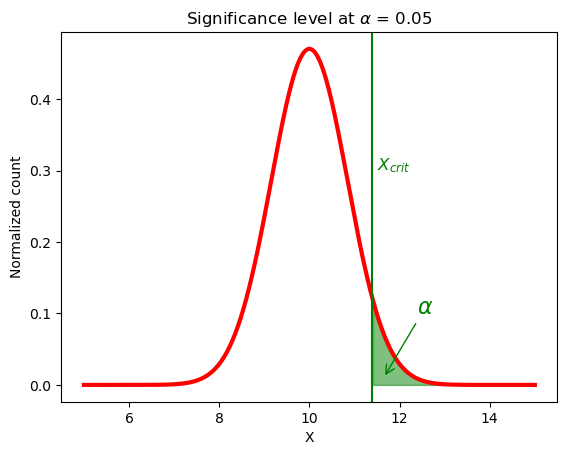

In [7]:
signif_05()

Error reformulation:
- Significance Level $\alpha$: probability we reject null when the null is true

Error reformulation:
- Significance Level $\alpha$: probability we reject null when the null is true

**Type I error**: a false positive
- reject $H_0$ and adopt $H_a$ falsely

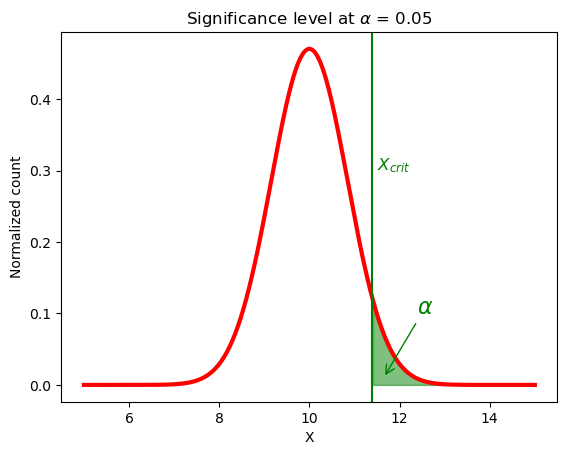

In [8]:
signif_05()

What could we do to lower this type of error?

A sensible approach:
- lower significance level $\alpha$ (this is the type I error rate, after all!)

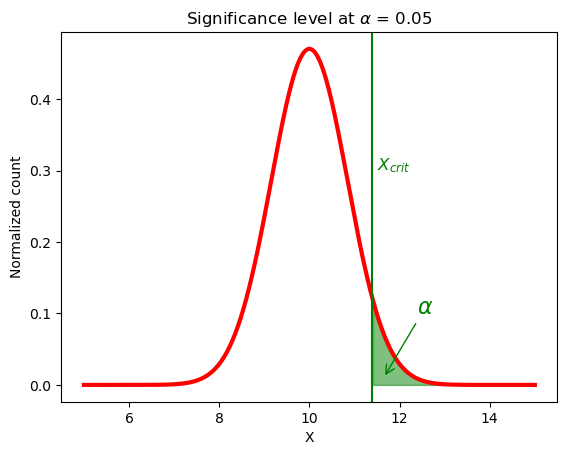

In [9]:
signif_05()

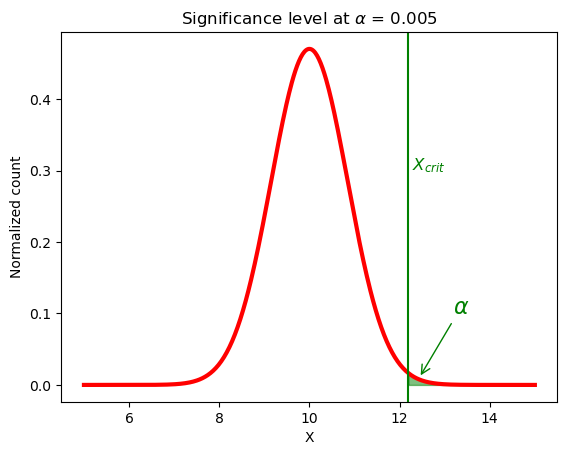

In [10]:
signif_005()

Seems good, right?

But let's imagine we had access to  population for $H_a$:
- $\mu_1 = 12$
- For simplicity: $\sigma_1 = \sigma_0 = s $

In [58]:
N = 50
mu_1 = 12
std_1 = 6

std_sampling1 = std_1/np.sqrt(N)

In [12]:
%%capture signif_05_withalt
alpha = 0.05

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha))
plt.show()

In [13]:
%%capture signif_05_withalt_beta
alpha = 0.05

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha))
plt.show()

In [14]:
%%capture signif_005_alt_withbeta
alpha = 0.005

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0)
X_crit = mu_0 + norm.isf(alpha)*std_sampling0
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1)


plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)
plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')


plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('X')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha))
plt.show()

Plot distribution of sampling means for null and for alternate together:

At given significance level $\alpha$:

$X < X_{crit}$: we do **NOT** reject the null



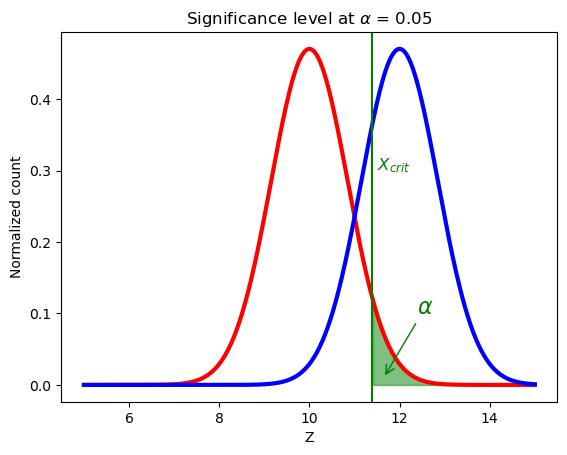

In [15]:
signif_05_withalt()

Blue shaded region $\beta$:
- Probability $X < X_{crit}$ under the alternate hypothesis $H_a$

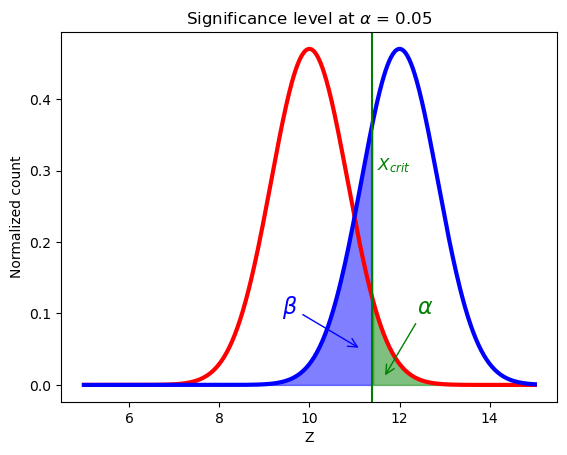

In [16]:
signif_05_withalt_beta()

In terms of error reformulation, $\beta$ is:

- Probability that alternate was correct
- But we incorrectly did not reject the null

**Type II error: False negative**

So what could be the problem when we decrease $\alpha$?

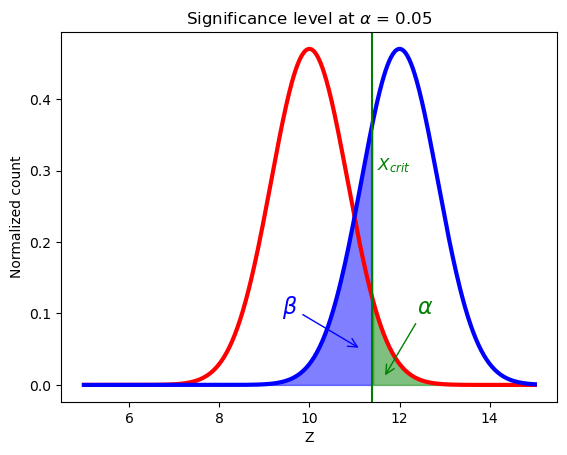

In [17]:
signif_05_withalt_beta()

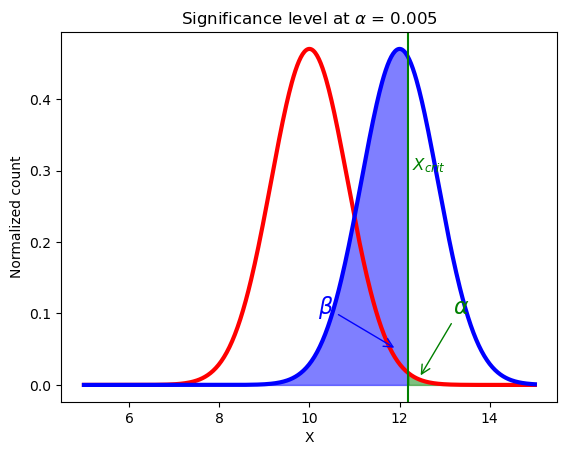

In [18]:
signif_005_alt_withbeta()

By decreasing significance level $\alpha$:
- reduce type I error (false positive rate)
- can increase type II errors (false negative rate)

**Fundamental tradeoff between $\alpha$ and $\beta$**

- $\alpha$ as a detection threshold:
    - making threshold on detecting alternate very stringent
    - when we detect alternate likely to be correct

- but increase $\beta$: 
    - loose sensitivity to detecting the alternate

**Statistical power of test: another way to formulate this issue**

$$ P = 1 - \beta $$  

Rate that statistical test (defined at given $\alpha$) rejects $H_0$ correctly when $H_a$ is true.

Detecting an effect after a treatment:
- clearly want to construct test to maximize $P$

Besides $\alpha$, what parameters affect the statistical power $P$?

1. <font color = 'red'>the sample size(s) $N$ </font>
2. effect size

Had $N = 50$ samples in previous statistical test.

Increase $N$ and see what happens.

In [19]:
%%capture signif_05_withalt_beta_largerN
alpha = 0.05
N_new = 100
std_sampling0new = std_0/np.sqrt(N_new)
std_sampling1new = std_1/np.sqrt(N_new)

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0new)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1new)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0new

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha) + ", N = " + str(N_new))
plt.show()

In [20]:
%%capture signif_05_withalt_beta_N50
alpha = 0.05
N_new = 50
std_sampling0new = std_0/np.sqrt(N_new)
std_sampling1new = std_1/np.sqrt(N_new)

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0new)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1new)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0new

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha) + ", N = " + str(N_new))
plt.show()

In [21]:
%%capture signif_05_withalt_beta_N175
alpha = 0.05
N_new = 175
std_sampling0new = std_0/np.sqrt(N_new)
std_sampling1new = std_1/np.sqrt(N_new)

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0new)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1new)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0new

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha) + ", N = " + str(N_new))
plt.show()

In [22]:
%%capture signif_005_withalt_beta_N175
alpha = 0.005
N_new = 175
std_sampling0new = std_0/np.sqrt(N_new)
std_sampling1new = std_1/np.sqrt(N_new)

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0new)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1new)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0new

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha) + ", N = " + str(N_new))
plt.show()

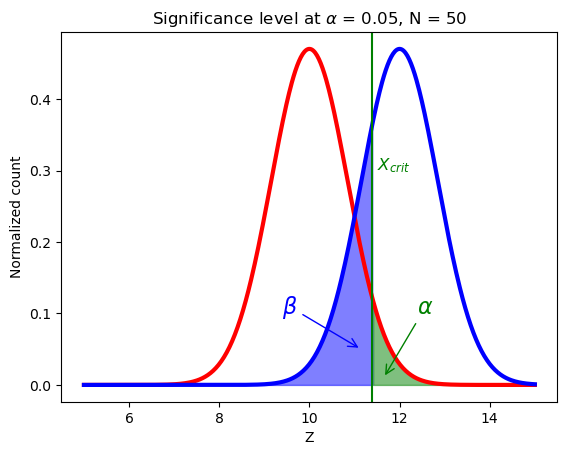

In [23]:
signif_05_withalt_beta_N50()

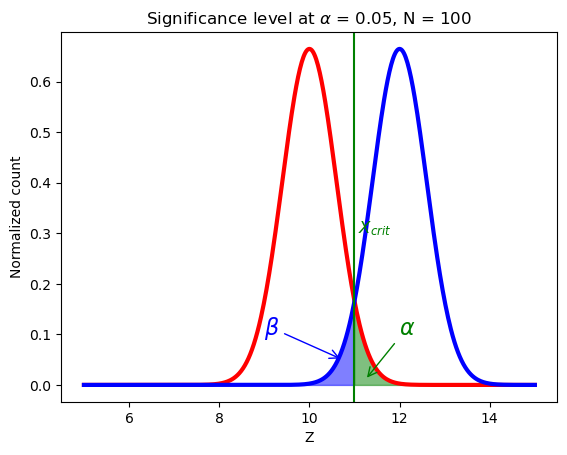

In [24]:
signif_05_withalt_beta_largerN()

Let's increase N a little more:

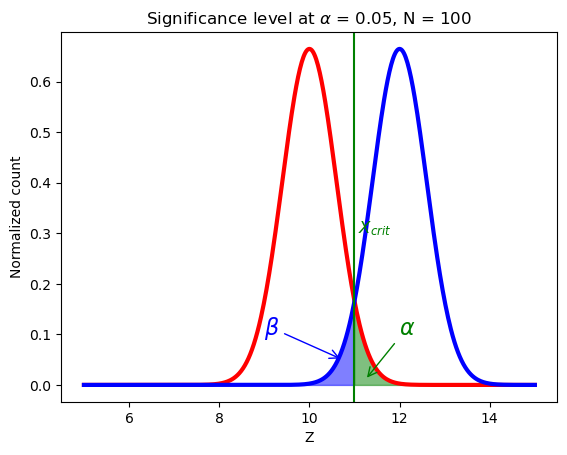

In [25]:
signif_05_withalt_beta_largerN()

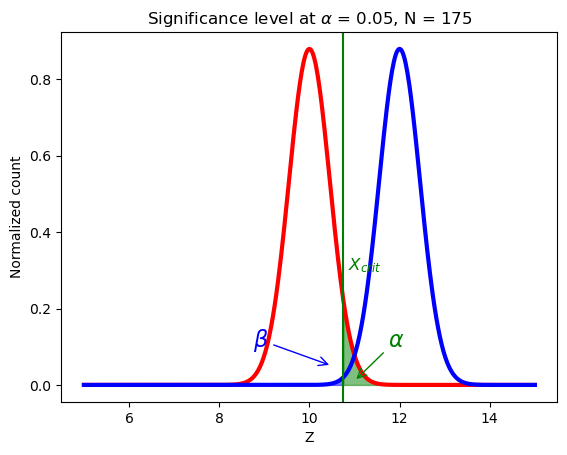

In [26]:
signif_05_withalt_beta_N175()

Increasing $N$ sharpens sampling distributions.

Calculating $\beta$ under the alternate hypothesis for different sample sizes:

In [27]:
# calculating beta for N = 100 at significance level alpha = 0.05
alpha = 0.05
N_tr = 100
X_cr = norm.isf(alpha, loc = 10, scale = std_0/np.sqrt(N_tr) ) # get critical X value
beta_N100 = norm.cdf(X_cr, loc = 12, scale = std_1/np.sqrt(N_tr)) # calculate beta
beta_N100

0.04565959066403442

In [28]:
# calculating beta for N = 175 at significance level alpha = 0.05
alpha = 0.05
N_tr = 175
X_cr = norm.isf(alpha, loc = 10, scale = std_0/np.sqrt(N_tr) ) # get critical X value
beta_N100 = norm.cdf(X_cr, loc = 12, scale = std_1/np.sqrt(N_tr))
beta_N100

0.002848479931779857

Increasing sample size:
- results in large reduction in $\beta$

Why? 

- As $N$ increases: large fluctuation of sample mean from population mean becomes less likely.
- True for both null and alternate distribution of sampling means 

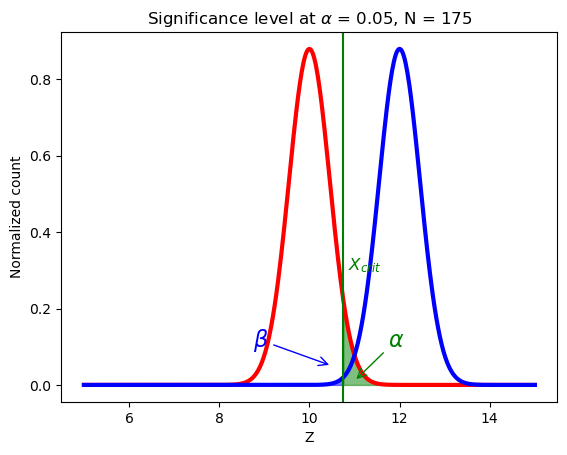

In [29]:
signif_05_withalt_beta_N175()

In region not rejecting null:
- increasingly unlikely that sample mean could have come from alternate
- as $N$ increases

With larger $N$:
- allows us to lower significance level $\alpha$
- keeping $\beta$ tolerable or low

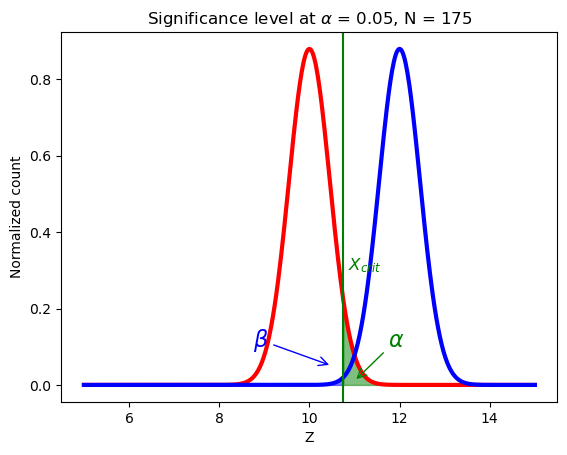

In [30]:
signif_05_withalt_beta_N175()

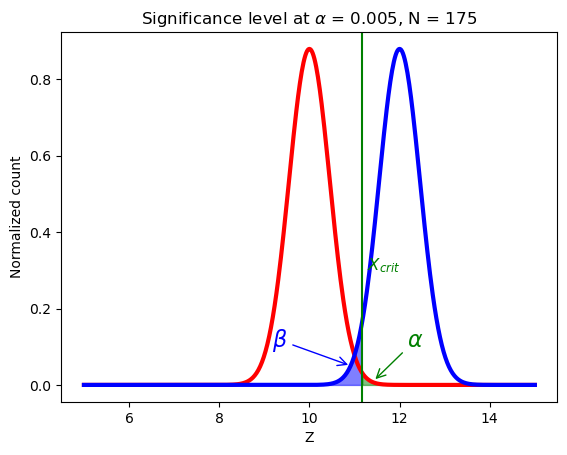

In [31]:
signif_005_withalt_beta_N175()

In [32]:
# calculating beta for N = 175 at significance level alpha = 0.005
alpha = 0.05
N_tr = 175
X_cr = norm.isf(alpha, loc = 10, scale = std_0/np.sqrt(N_tr) ) # get critical X value
beta_N100_05 = norm.cdf(X_cr, loc = 12, scale = std_1/np.sqrt(N_tr))
beta_N100_05

0.002848479931779857

In [33]:
# calculating beta for N = 175 at significance level alpha = 0.005
alpha = 0.005
N_tr = 175
X_cr = norm.isf(alpha, loc = 10, scale = std_0/np.sqrt(N_tr) ) # get critical X value
beta_N100_005 = norm.cdf(X_cr, loc = 12, scale = std_1/np.sqrt(N_tr))
beta_N100_005

0.033345094943489875

Increasing sample size $N$:
- lowers $\beta$ (false negative rate) / increases statistical power $P$
- allows us to set threshold $\alpha$ lower: reduces false positive rate

Besides $\alpha$, what parameters affect the statistical power $P$?

1. the sample size(s) $N$ 
2. <font color = 'red'> effect size </font>

Effect size has to do with the underlying population parameters:
- $\mu_0$: mean of true population distribution under null
- $\mu_1$: mean of true population distribution of alternate group

For simplicity assume same standard deviation of underlying populations $\sigma$

**Conducting test to see whether these are different or not based on sampling and distribution of statistic**

$$ \frac{\bar{X_1} - \bar{X_2}}{\sigma/\sqrt{N}} $$

We've already covered the effect of $N$:
$$ \frac{\bar{X_1} - \mu_0}{\sigma/\sqrt{N}} $$

But what about:
$$ \frac{\bar{X_1} - \mu_0}{\sigma} $$

Representative of the differences in the underlying population means 

$$ \frac{\mu_1 - \mu_0}{\sigma} $$

between the two groups

In [34]:
%%capture underlying

x_scaled = np.linspace(-10,35,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_0)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_1)

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)
plt.axvline(12, linestyle = '--', c = 'b')
plt.axvline(10, linestyle = '--', c = 'r')

plt.xlabel('X')
plt.ylabel('Normalized count')
plt.title(r'Underlying distribution for two populations')
plt.show()

Difference in mean relative to spread:

$$ \frac{\mu_1 - \mu_0}{\sigma} $$

**More meaningful measure of difference in populations than $\mu_1 - \mu_0$**

Visualization of underlying distribution:

- assuming normality:  $\mu_0 = 10$ and $\mu_1 = 12$
- $\sigma$ = 6

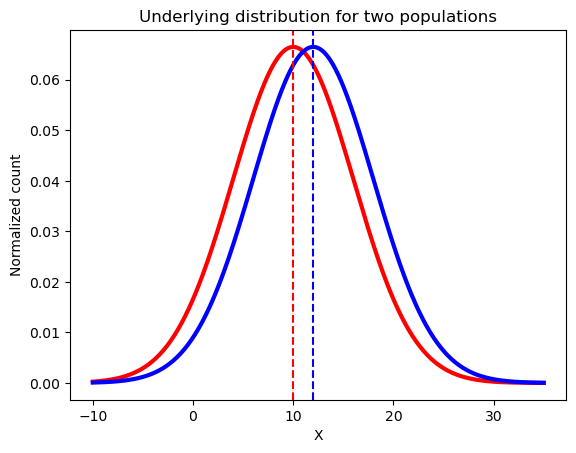

In [35]:
underlying()

These underlying distributions have a lot of overlap:
- for normal population distributions: $$ \frac{\mu_1 - \mu_0}{\sigma}$$ 
- or if only have samples from each distribution:
$$ d = \frac{\bar{X}_1 - \bar{X}_0}{s} $$

**Measure of distribution overlap**

Known as Cohen's d:

In [36]:
mu_0 = 10
mu_1 = 12
std_0 = 6

Cohen_d = (mu_1 - mu_0)/std_0
print(Cohen_d)

0.3333333333333333


**Cohen's d is a measure of the size of effect:**
- or measure of difference in means under two scenarios
- relative to a measure of fluctuation/uncertainty in both

Suppose that the intrinsic spread in the population distributions smaller:
- $\sigma = 1$

In [59]:
mu_0 = 10
mu_1 = 12
std_new0 = 1

Cohen_d_new = (mu_1 - mu_0)/std_new0
print(Cohen_d_new)

2.0


In [38]:
%%capture underlying_largerd

x_scaled = np.linspace(0,20,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_new0)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_new0)

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)
plt.axvline(12, linestyle = '--', c = 'b')
plt.axvline(10, linestyle = '--', c = 'r')
plt.annotate(r'$\sigma = 1$', xy = (12 + 4, .35), fontsize = 15)
plt.xlabel('X')
plt.ylabel('Normalized count')
plt.title(r'Underlying distribution for two populations')
plt.show()

There is far more differentiation (less overlap) between the two distributions now:
- while difference in means same
- thus larger effect given intrinsic variability of populations

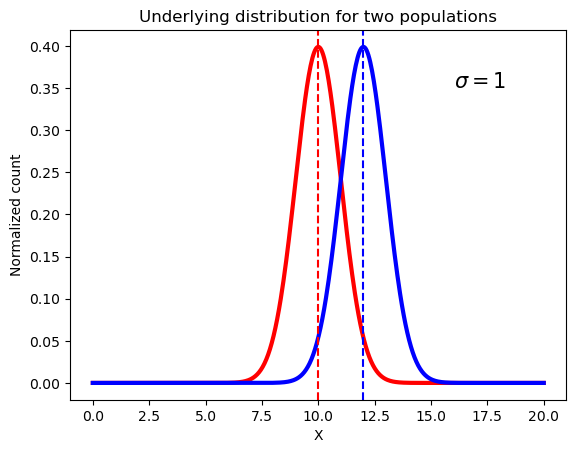

In [39]:
underlying_largerd()

And when $\sigma = 6$:

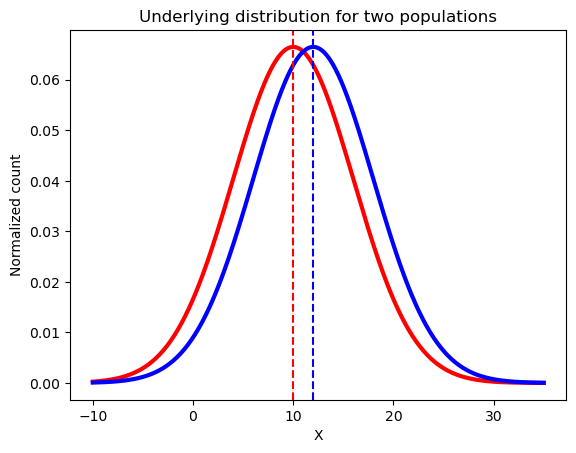

In [40]:
underlying()

Which is reflected in Cohen's d:

In [41]:
# sigma = 6
Cohen_d

0.3333333333333333

In [42]:
# sigma = 1
Cohen_d_new

2.0

The larger the effect size:
-  or bigger the difference between two normal populations and their means
- bigger Cohen's d 

| Effect Size     | Cohen's d |
| ----------- | ----------- |
| Small      | 0.2       |
| Moderate  | 0.5        |
| Large | 0.8        |

**Impact of effect size on sampling distribution**

Intuition tells us:
- smaller effect size / more distribution overlap
- requires more data to differentiation between distributions

Let's fix $N = 50$:
- look at distribution of sample means under null and alternate
- for small and larger effect size


Small effect size:
- $\mu_1 = 12$
- $\mu_0 = 10$
- $\sigma = 6$

In [43]:
print(Cohen_d)

0.3333333333333333


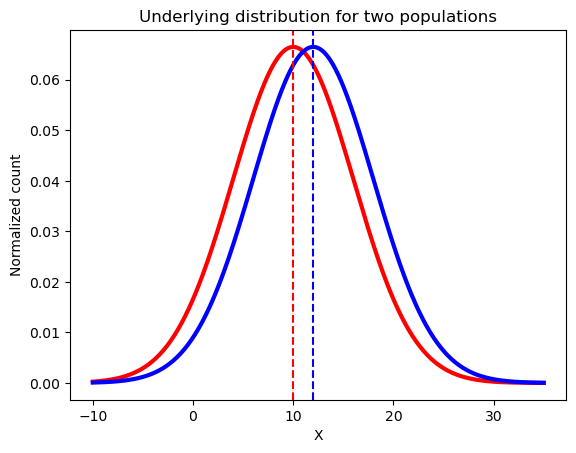

In [44]:
underlying()

Distribution of sample means at N = 50:

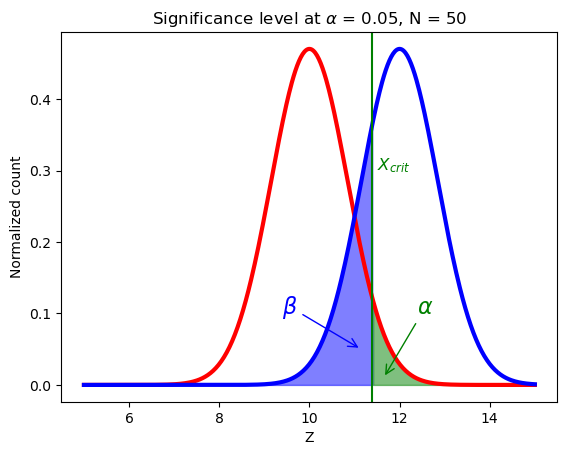

In [45]:
signif_05_withalt_beta_N50()

Type II error rate is high:
- due to underlying distribution overlap

Had to increase sample size to be sure means different:
- given small effect size (large distribution overlap)
- $N = 175$

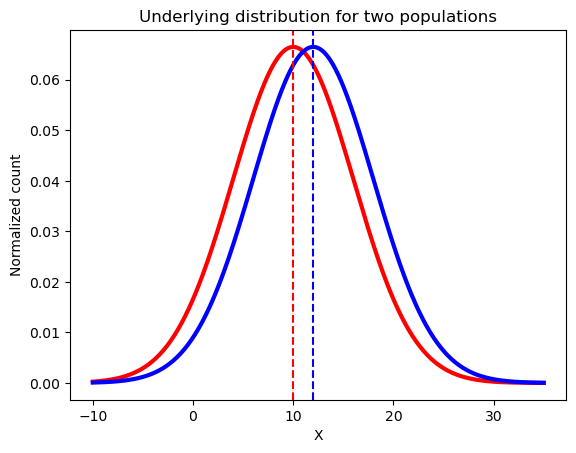

In [46]:
underlying()

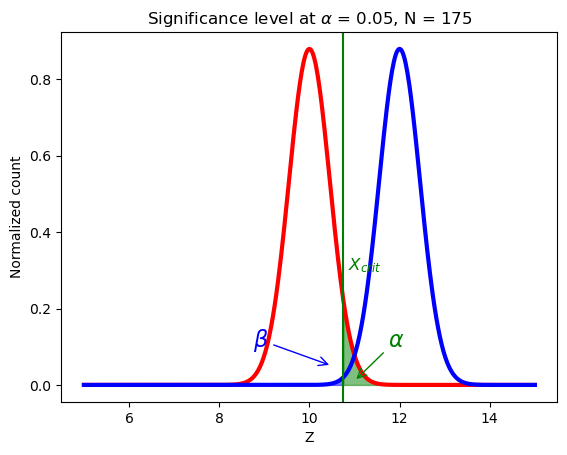

In [47]:
signif_05_withalt_beta_N175()

But what if the effect size had been bigger?

Let's keep sample size $N = 50$.

In [48]:
%%capture signif_05_withalt_beta_N50_largerpower
alpha = 0.05
N_new = 50
std_new = 1
std_sampling0newpower = std_new/np.sqrt(N_new)
std_sampling1newpower = std_new/np.sqrt(N_new)

x_scaled = np.linspace(5,15,500)
Y_scaled = norm.pdf(x_scaled, loc = mu_0, scale = std_sampling0newpower)
Y_scaled_alt = norm.pdf(x_scaled, loc = mu_1, scale =  std_sampling1newpower)

X_crit = mu_0 + norm.isf(alpha)*std_sampling0newpower

plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.plot(x_scaled, Y_scaled_alt, c ='b', linewidth = 3)

plt.axvline(X_crit, c = 'green')
plt.fill_between(x_scaled, Y_scaled, where = (X_crit <= x_scaled), alpha = 0.5, color='green')
plt.fill_between(x_scaled, Y_scaled_alt, where = (X_crit >= x_scaled), alpha = 0.5, color='blue')

plt.annotate('$X_{crit}$', xy = (X_crit + 0.1,.3), fontsize=12, c ='green' )
plt.annotate(r'$\alpha$', xy = (X_crit + .25 , 0.01), xytext = (X_crit + 1 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'g'}, c ='green' )
plt.annotate(r'$\beta$', xy = (X_crit - .25 , 0.05), xytext = (X_crit - 2 , 0.1), fontsize=16, arrowprops = {'arrowstyle':'->', 'color': 'b'}, c ='blue' )

plt.xlabel('Z')
plt.ylabel('Normalized count')
plt.title(r'Significance level at $\alpha$ = ' + str(alpha) + ", N = " + str(N_new) + ", Cohen d = " + str(Cohen_d_new))
plt.show()

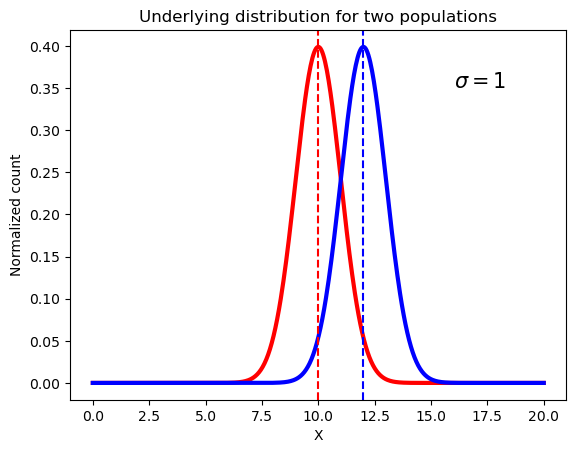

In [49]:
underlying_largerd()

Sampling mean distributions

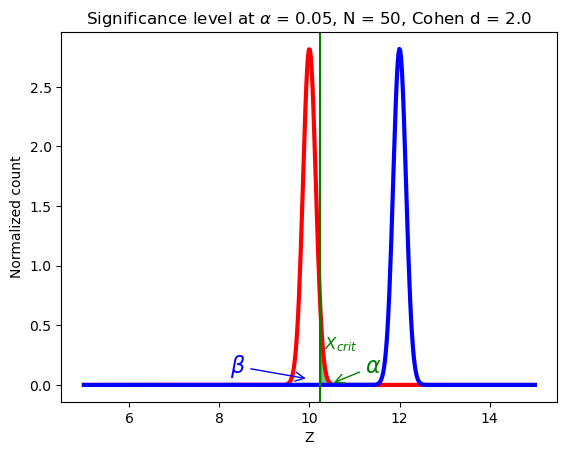

In [50]:
signif_05_withalt_beta_N50_largerpower()

Comparing sampling mean distributions at low and high effect size with $ N = 50$ sample size:

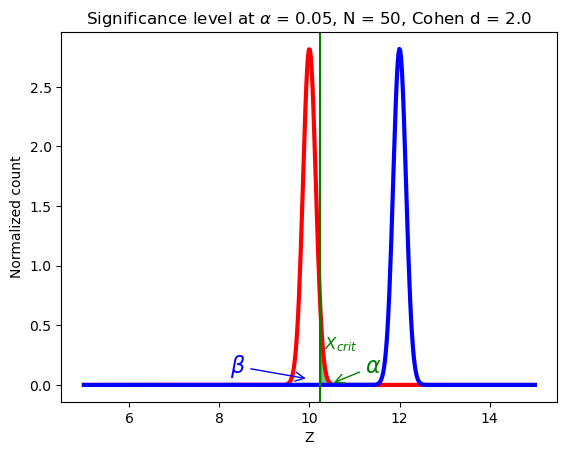

In [51]:
signif_05_withalt_beta_N50_largerpower()

Cohen's d= 0.3333

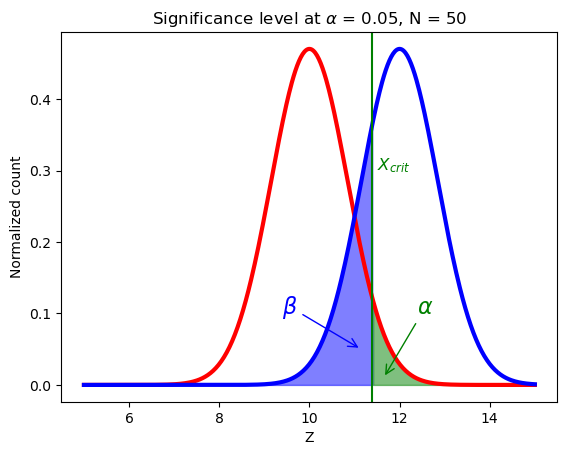

In [52]:
signif_05_withalt_beta_N50()

As one might expect, small effect size (all other things being equal):
- Hard to distinguish between $H_0$ and $H_a$ on finite size sample
- increases $\beta$ (not rejecting null when alternate is true)
- reducing statistical power of test $ P = 1 - \beta$

**Summary:**

Statistical power $P = 1 - \beta$ (probability of rejecting null correctly when alternate is true)

with $\beta$ -- Type II error (do not reject null when alternate is true)



Dependent on:
- $\alpha$ significance threshold -- Type I error probability (reject null when null is true)
- sample size(s) $N$
- effect size (Cohen's d for normal populations of $H_0$ and $H_a$)

**Above considerations often used to design statistical trials / experiments**

In designing experiments:
- often conducting trails where we want high statistical power $P$
- typical $P = 0.8$ cutoff set by experimenter
- significance threshold $\alpha$ also set by experimenter


Often want to known how many measurements one needs:
- i.e. $N$ required 
- to get a given $P$

**evaluated at different effect sizes**

This allows experimenter to decide how much data is *necessary* dependent of effect size

**In principled way**

Statsmodels has a very nice way to do this for us

In [60]:
from statsmodels.stats.power import TTestIndPower

In [54]:
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

Create a TtestIndpower object
- will output argument that is None
- given other necessary arguments filled
- ratio is relative size of the two samples

In [55]:
# perform power analysis
analysis = TTestIndPower()
# solve_power() method is the workhorse here
result = analysis.solve_power(0.8, power=power, nobs1=None, ratio=1.0, alpha=alpha) # for two-sided
print('Sample Size: %.3f' % result)

Sample Size: 25.525


Outputs required sample size for t-test:
- given power $P$, etc...

Can also get statistical power of test $P$:
- given type of test and other parameters
- effect size, $N$, $\alpha$

In [56]:
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None, nobs1=40, ratio=1.0, alpha=alpha)
print('Power: %.3f' % result)

Power: 0.942
